In [ ]:
import pandas as pd

# Load the Hi-C matrix into a pandas DataFrame
file_path = '/content/hic_matrix'
df = pd.read_csv(file_path, sep='\t', header=None, names=['Source Bin', 'Target Bin', 'Interaction Value'])

# Display the first few rows of the DataFrame
df.head()

,Source Bin,Target Bin,Interaction Value
0,0,0,4885.0
1,0,1582,1088.0
2,1582,1582,5468.0
3,0,3164,406.0
4,1582,3164,829.0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

In [ ]:
# Sort the DataFrame by 'Source Bin' and 'Target Bin'
df_sorted = df.sort_values(by=['Source Bin', 'Target Bin']).reset_index(drop=True)

In [ ]:
# Display the first few rows of the DataFrame
df_sorted.head()

,Source Bin,Target Bin,Interaction Value
0,0,0,4885.0
1,0,1582,1088.0
2,0,3164,406.0
3,0,4746,229.0
4,0,6328,139.0


In [ ]:
# Determine the size of the matrix
max_bin = max(df_sorted['Source Bin'].max(), df_sorted['Target Bin'].max()) + 1

# Create a sparse matrix with the corresponding weights
row = df_sorted['Source Bin'].values
col = df_sorted['Target Bin'].values
data = df_sorted['Interaction Value'].values
sparse_matrix = coo_matrix((data, (row, col)), shape=(max_bin, max_bin))

# Convert the sparse matrix to a dense format for plotting (only for visualization)
# Note: This step might still be memory-intensive, but we will take a subset for visualization
dense_matrix = sparse_matrix.toarray()

In [ ]:
print(dense_matrix)

[[4.885e+03 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 2.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 1.280e+02]]


In [ ]:
# Plotting the heatmap with seaborn
plt.figure(figsize=(10, 10))  # Adjust the size as needed
sns.heatmap(dense_matrix, cmap='Reds', square=True)
plt.title('Hi-C Interaction Heatmap for Brassica napus')
plt.xlabel('Genomic Loci')
plt.ylabel('Genomic Loci')
plt.show()

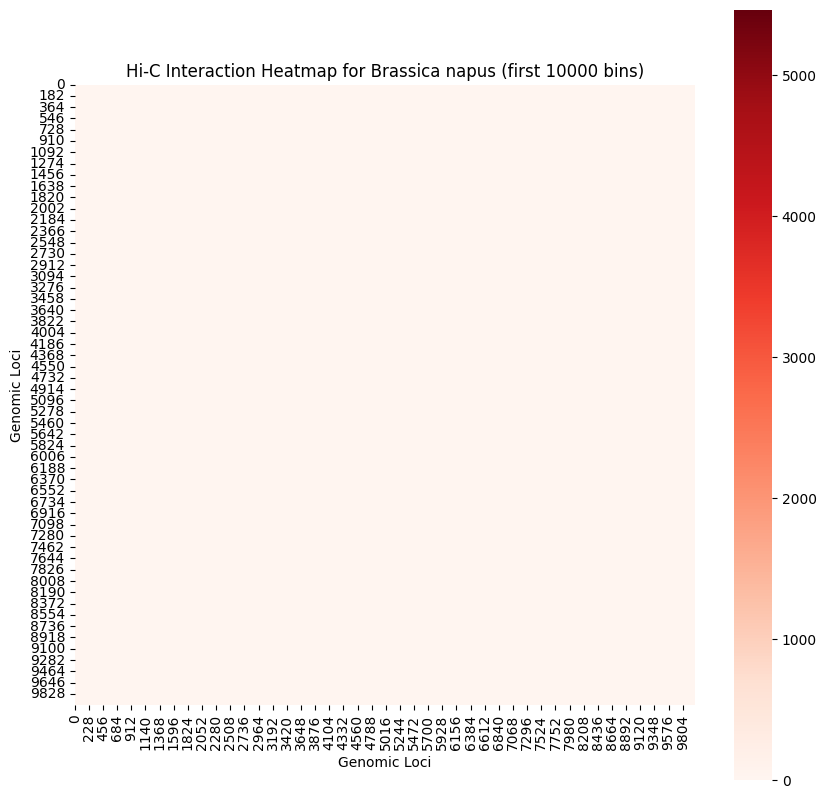

In [ ]:
# Specify the range of bins you are interested in (e.g., first 1000 bins)
subset_range = 10000
dense_matrix_subset = dense_matrix[:subset_range, :subset_range]

# Plotting the subset heatmap with seaborn
plt.figure(figsize=(10, 10))  # Adjust the size as needed
sns.heatmap(dense_matrix_subset, cmap='Reds', square=True)
plt.title(f'Hi-C Interaction Heatmap for Brassica napus (first {subset_range} bins)')
plt.xlabel('Genomic Loci')
plt.ylabel('Genomic Loci')
plt.show()


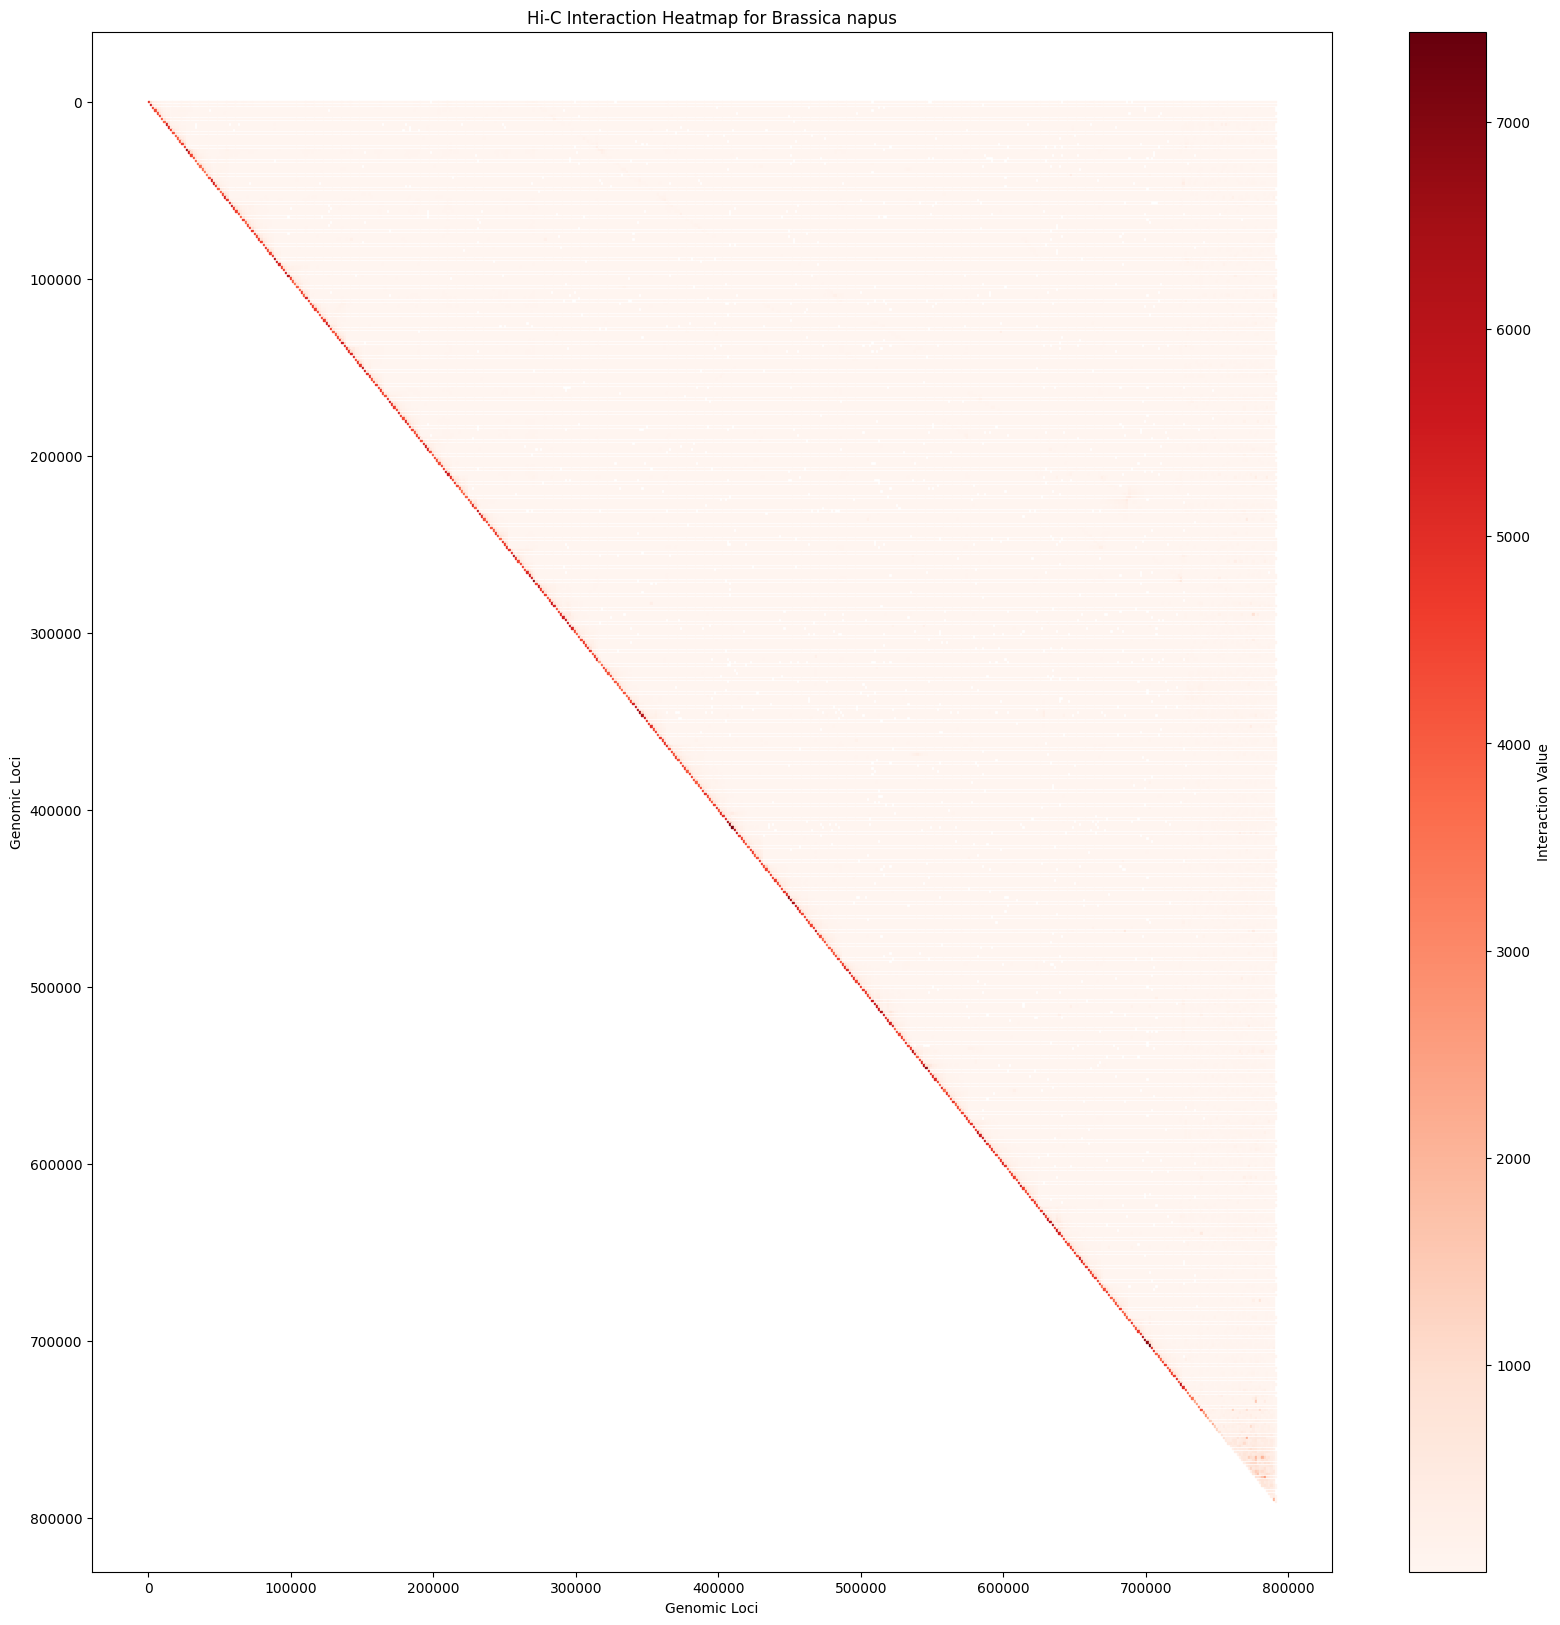

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

# Load the Hi-C matrix into a pandas DataFrame
df = pd.read_csv('/content/hic_matrix', sep='\t', header=None, names=['Source Bin', 'Target Bin', 'Interaction Value'])

# Sort the DataFrame by 'Source Bin' and 'Target Bin'
df_sorted = df.sort_values(by=['Source Bin', 'Target Bin']).reset_index(drop=True)

# Determine the size of the matrix
max_bin = max(df_sorted['Source Bin'].max(), df_sorted['Target Bin'].max()) + 1

# Create a sparse matrix with the corresponding weights
row = df_sorted['Source Bin'].values
col = df_sorted['Target Bin'].values
data = df_sorted['Interaction Value'].values
sparse_matrix = coo_matrix((data, (row, col)), shape=(max_bin, max_bin))

# Plotting the heatmap directly from the sparse matrix
plt.figure(figsize=(20, 20))  # Adjust the size as needed

# Use a scatter plot to represent the heatmap
plt.scatter(sparse_matrix.col, sparse_matrix.row, c=sparse_matrix.data, cmap='Reds', s=1, marker='s')
plt.gca().invert_yaxis()  # Invert the y-axis to match the heatmap orientation

plt.title('Hi-C Interaction Heatmap for Brassica napus')
plt.xlabel('Genomic Loci')
plt.ylabel('Genomic Loci')
plt.colorbar(label='Interaction Value')

plt.show()


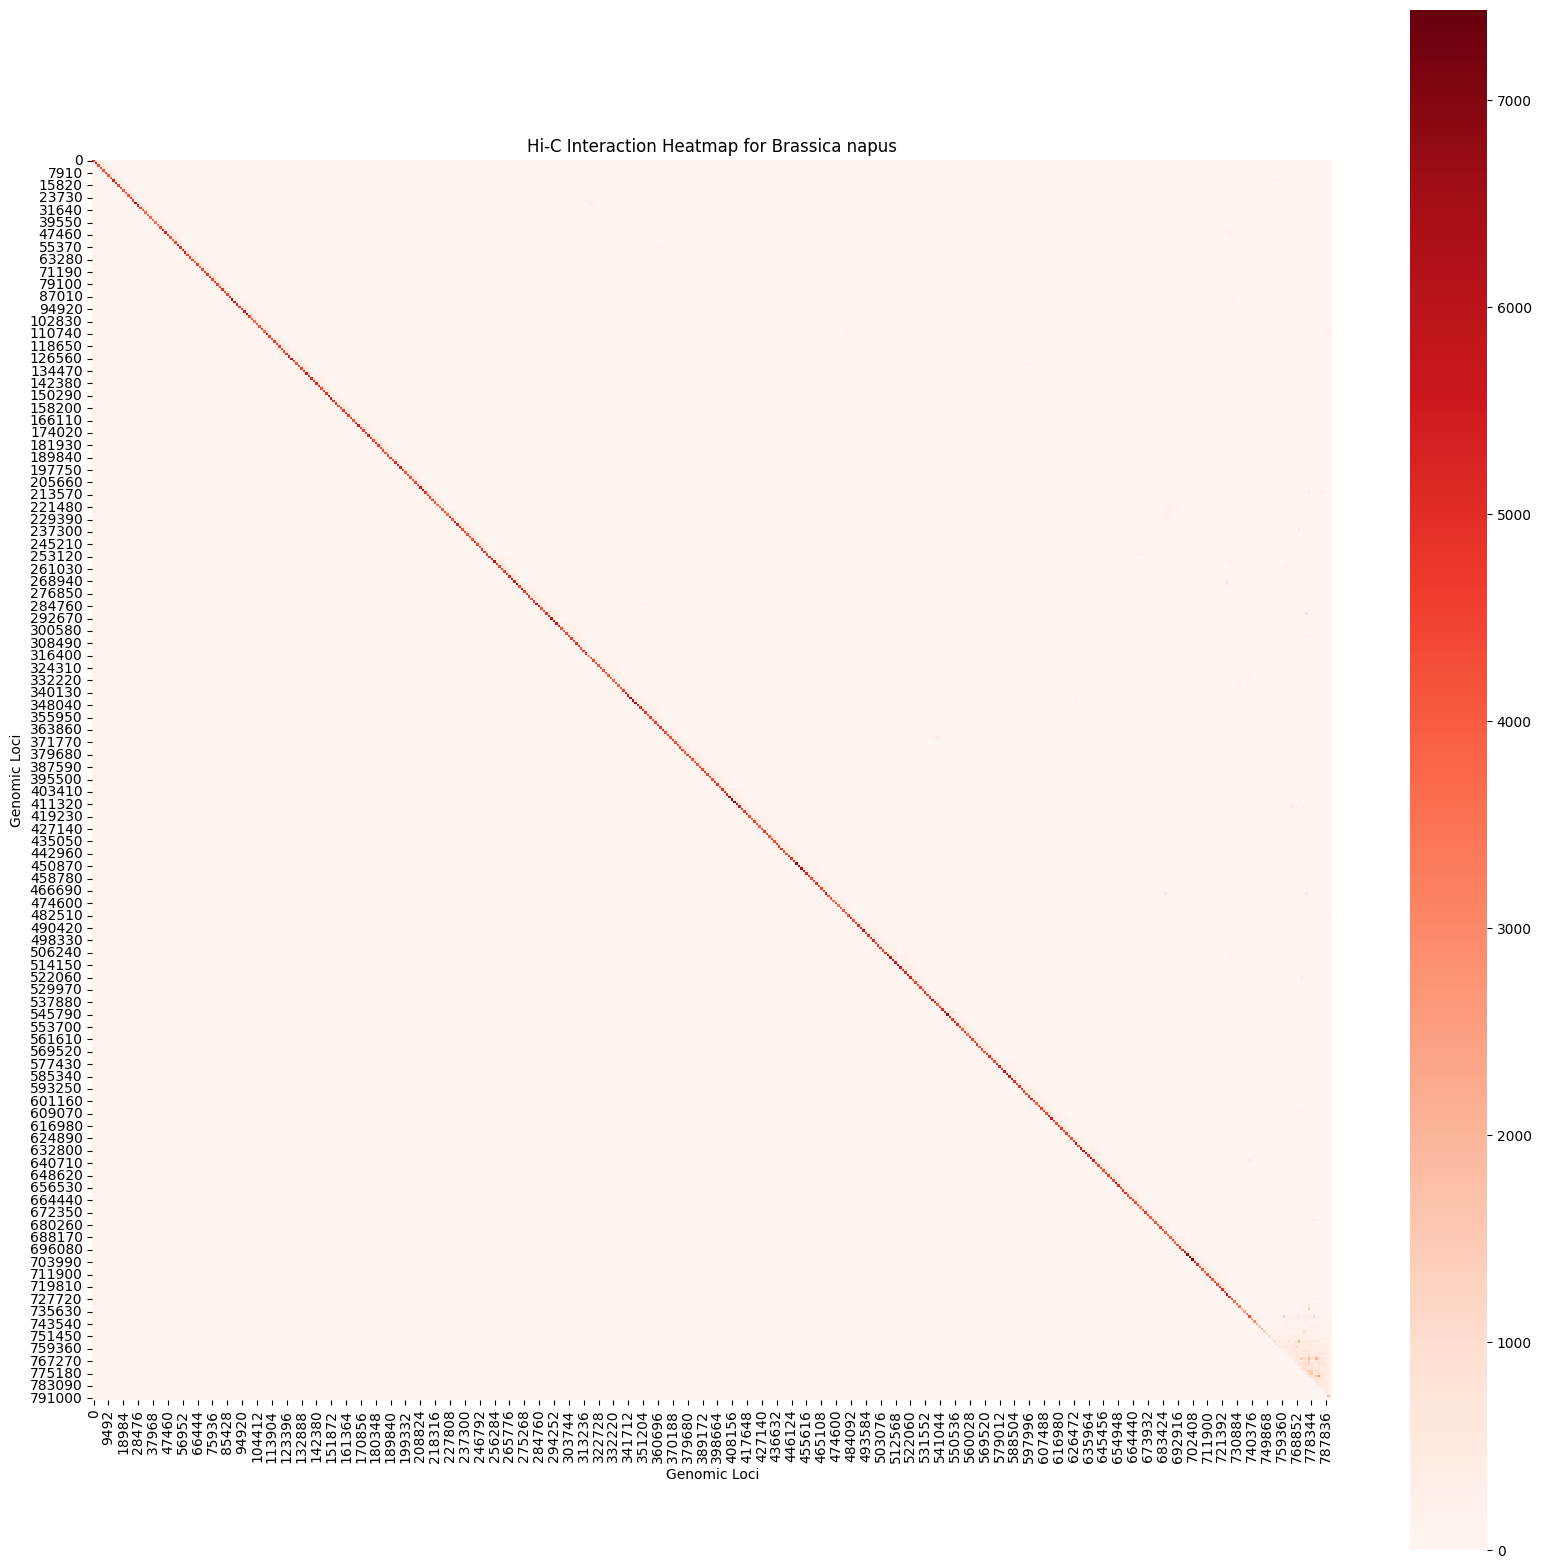

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

# Load the Hi-C matrix into a pandas DataFrame
df = pd.read_csv('/content/hic_matrix', sep='\t', header=None, names=['Source Bin', 'Target Bin', 'Interaction Value'])

# Sort the DataFrame by 'Source Bin' and 'Target Bin'
df_sorted = df.sort_values(by=['Source Bin', 'Target Bin']).reset_index(drop=True)

# Determine the size of the matrix
max_bin = max(df_sorted['Source Bin'].max(), df_sorted['Target Bin'].max()) + 1

# Create a sparse matrix with the corresponding weights
row = df_sorted['Source Bin'].values
col = df_sorted['Target Bin'].values
data = df_sorted['Interaction Value'].values
sparse_matrix = coo_matrix((data, (row, col)), shape=(max_bin, max_bin))

# Convert the sparse matrix to a dense format for visualization (if memory allows)
# Plotting the heatmap with seaborn directly
plt.figure(figsize=(20, 20))  # Adjust the size as needed

# Extract the non-zero values from the sparse matrix
interaction_df = pd.DataFrame({'row': sparse_matrix.row, 'col': sparse_matrix.col, 'data': sparse_matrix.data})

# Pivot the DataFrame to get a matrix format
heatmap_data = interaction_df.pivot_table(index='row', columns='col', values='data', fill_value=0)

# Plot the heatmap using seaborn
sns.heatmap(heatmap_data, cmap='Reds', square=True)
plt.title('Hi-C Interaction Heatmap for Brassica napus')
plt.xlabel('Genomic Loci')
plt.ylabel('Genomic Loci')

plt.show()


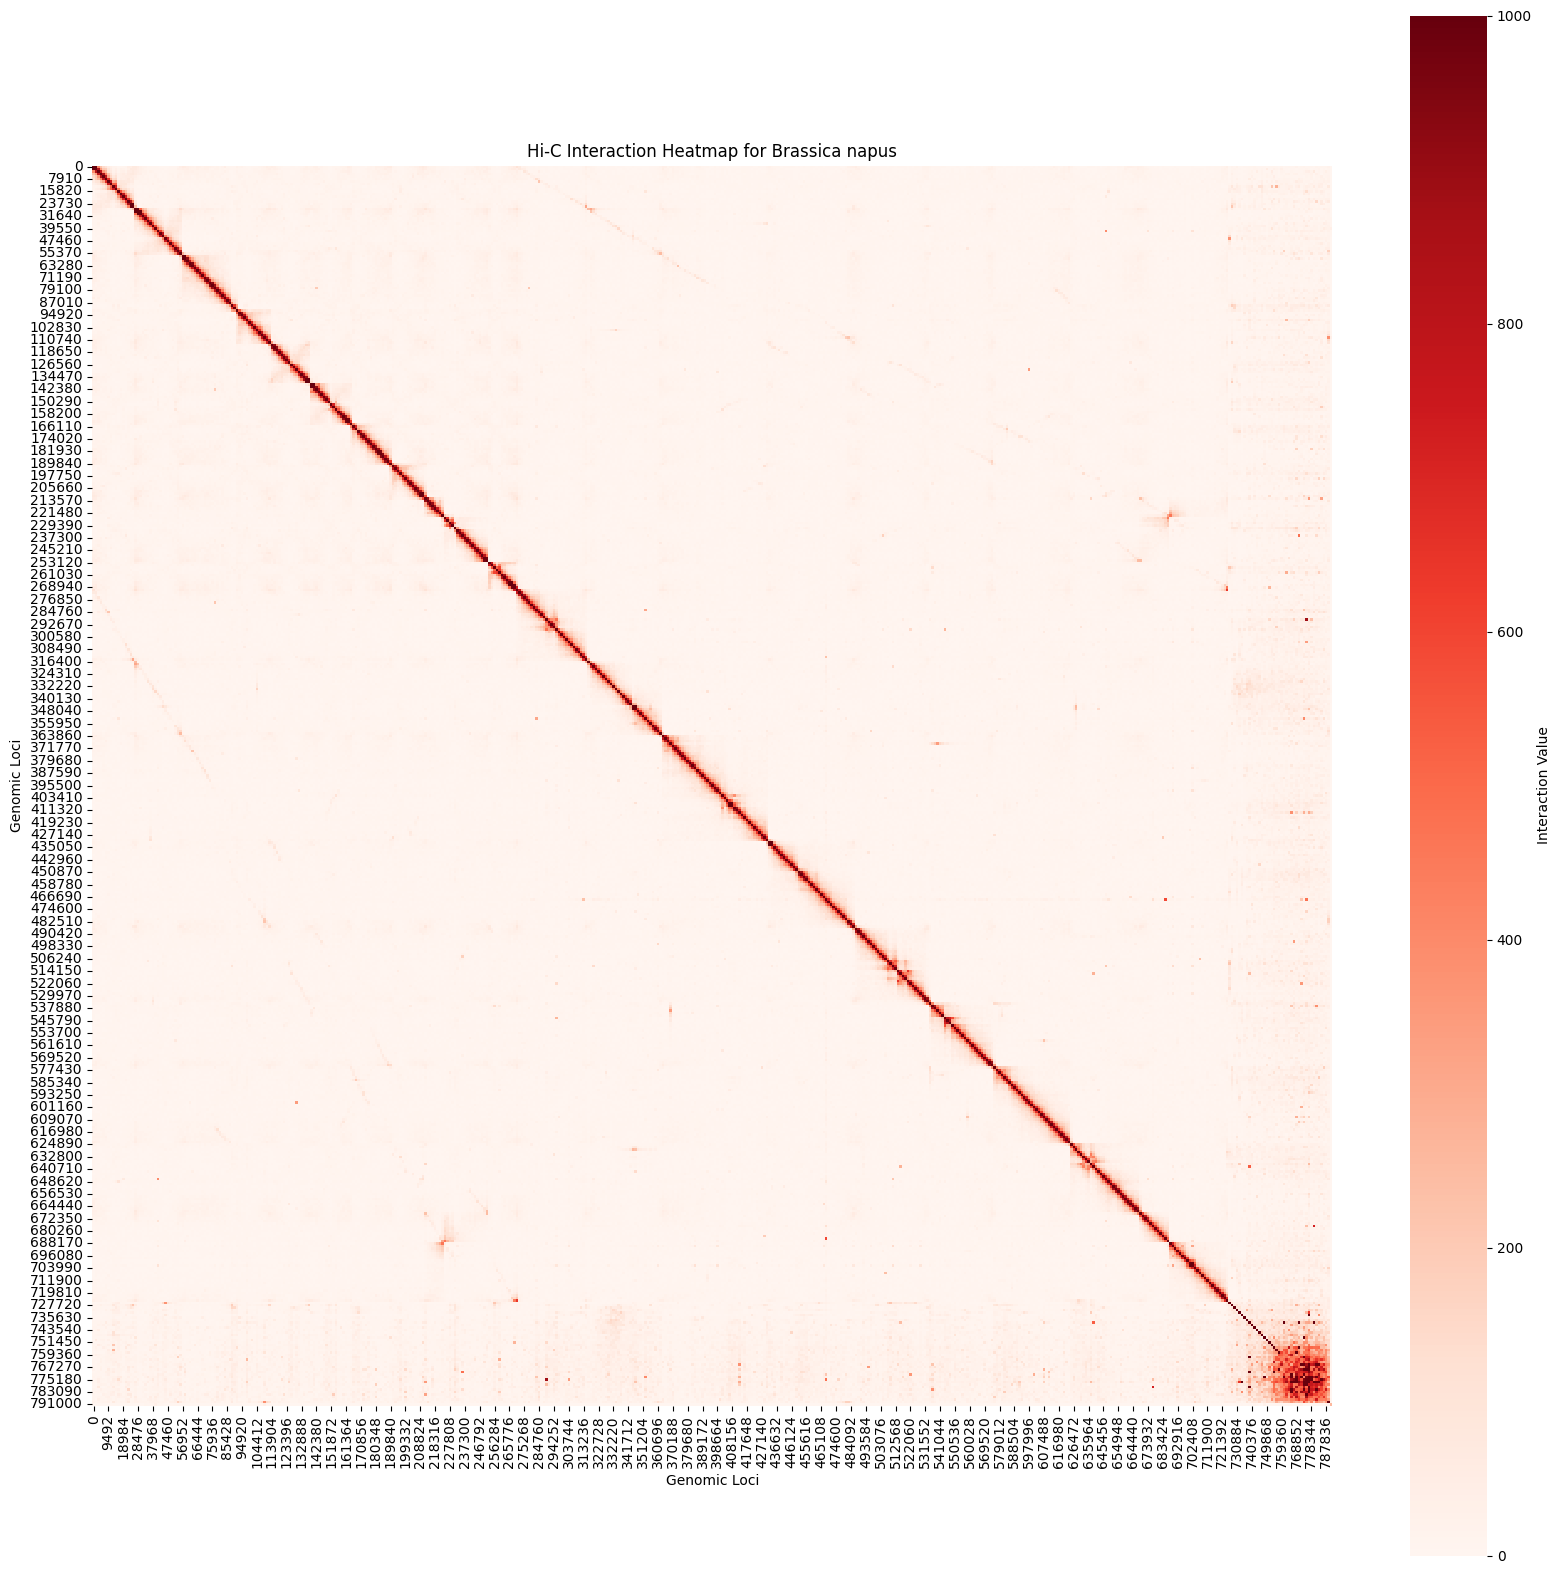

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

# Load the Hi-C matrix into a pandas DataFrame
df = pd.read_csv('/content/hic_matrix', sep='\t', header=None, names=['Source Bin', 'Target Bin', 'Interaction Value'])

# Sort the DataFrame by 'Source Bin' and 'Target Bin'
df_sorted = df.sort_values(by=['Source Bin', 'Target Bin']).reset_index(drop=True)

# Determine the size of the matrix
max_bin = max(df_sorted['Source Bin'].max(), df_sorted['Target Bin'].max()) + 1

# Create a sparse matrix with the corresponding weights
row = df_sorted['Source Bin'].values
col = df_sorted['Target Bin'].values
data = df_sorted['Interaction Value'].values
sparse_matrix = coo_matrix((data, (row, col)), shape=(max_bin, max_bin))

# Ensure symmetry by adding the transpose of the matrix to itself
symmetric_matrix = sparse_matrix + sparse_matrix.T

# Apply a threshold to the sparse matrix
threshold = 1000  # Set your desired threshold
symmetric_matrix.data[symmetric_matrix.data > threshold] = threshold

# Convert the symmetric matrix to a DataFrame for plotting
rows, cols, values = find(symmetric_matrix)
interaction_df = pd.DataFrame({'row': rows, 'col': cols, 'data': values})

# Plotting the heatmap with seaborn
plt.figure(figsize=(20, 20))  # Adjust the size as needed
heatmap_data = interaction_df.pivot(index='row', columns='col', values='data').fillna(0)
sns.heatmap(heatmap_data, cmap='Reds', square=True, cbar_kws={'label': 'Interaction Value'})
plt.title('Hi-C Interaction Heatmap for Brassica napus')
plt.xlabel('Genomic Loci')
plt.ylabel('Genomic Loci')
plt.show()


Brassica Dataset Processing to Make JSON to give input to 3d Node Visualization

In [ ]:
import pandas as pd
import json

# Load the Hi-C matrix into a pandas DataFrame
file_path = '/content/hic_matrix'
df = pd.read_csv(file_path, sep='\t', header=None, names=['Source Bin', 'Target Bin', 'Interaction Value'])

# Extract unique nodes
unique_nodes = pd.unique(df[['Source Bin', 'Target Bin']].values.ravel('K'))

# Create the nodes list
nodes = [{"id": f"Node{int(node)}", "group": 1} for node in unique_nodes]

# Create the links list
links = [{"source": f"Node{int(row['Source Bin'])}", "target": f"Node{int(row['Target Bin'])}", "value": row['Interaction Value']} for index, row in df.iterrows()]

# Combine nodes and links into a single dictionary
network_data = {
    "nodes": nodes,
    "links": links
}

# Save the network data to a JSON file
output_file_path = '/content/Brassica Napus.json'
with open(output_file_path, 'w') as f:
    json.dump(network_data, f, indent=4)

print(f"JSON data saved to {output_file_path}")


JSON data saved to /content/Brassica Napus.json


In [ ]:
import pandas as pd
import json

# Load the Hi-C matrix into a pandas DataFrame
file_path = '/content/hic_matrix'
df = pd.read_csv(file_path, sep='\t', header=None, names=['Source Bin', 'Target Bin', 'Interaction Value'])

# Remove self-interactions (where Source Bin is equal to Target Bin)
df = df[df['Source Bin'] != df['Target Bin']]

# Extract unique nodes and sort them
unique_nodes = sorted(pd.unique(df[['Source Bin', 'Target Bin']].values.ravel('K')))

# Create the nodes list
nodes = [{"id": f"Node{int(node)}", "group": 1} for node in unique_nodes]

# Create the links list from the dataset
links = [{"source": f"Node{int(row['Source Bin'])}", "target": f"Node{int(row['Target Bin'])}", "value": row['Interaction Value']} for index, row in df.iterrows()]

# Add links with weight 10000 between consecutive sorted nodes
for i in range(len(unique_nodes) - 1):
    source = unique_nodes[i]
    target = unique_nodes[i + 1]
    links.append({"source": f"Node{int(source)}", "target": f"Node{int(target)}", "value": 10000.0})

# Combine nodes and links into a single dictionary
network_data = {
    "nodes": nodes,
    "links": links
}

# Save the network data to a JSON file
output_file_path = '/content/Brassica Napus_final.json'
with open(output_file_path, 'w') as f:
    json.dump(network_data, f, indent=4)

print(f"JSON data saved to {output_file_path}")


JSON data saved to /content/Brassica Napus_final.json


In [ ]:
import numpy as np
import pandas as pd
import json
from google.colab import files

# Load the Hi-C matrix into a pandas DataFrame
file_path = '/content/hic_matrix'
df = pd.read_csv(file_path, sep='\t', header=None, names=['Source Bin', 'Target Bin', 'Interaction Value'])

# Remove self-interactions (where Source Bin is equal to Target Bin)
df = df[df['Source Bin'] != df['Target Bin']]

# Determine the top 5% threshold
top_5_threshold = df['Interaction Value'].quantile(0.95)

# Separate top 5% and the remaining 95%
df_top_5 = df[df['Interaction Value'] >= top_5_threshold]
df_rest_95 = df[df['Interaction Value'] < top_5_threshold]

# Apply a stronger scaling factor to the top 5%
df_top_5['Scaled Interaction Value'] = df_top_5['Interaction Value'] ** 2.5

# Apply a weaker scaling factor to the rest 95%
df_rest_95['Scaled Interaction Value'] = df_rest_95['Interaction Value'] * 0.000000001

# Combine the scaled values
df_combined = pd.concat([df_top_5, df_rest_95])

# Normalize the scaled interaction values to the range 0 to 10
scaled_interaction_values = df_combined['Scaled Interaction Value'].values
normalized_values = 10 * (scaled_interaction_values - scaled_interaction_values.min()) / (scaled_interaction_values.max() - scaled_interaction_values.min())
df_combined['Normalized Interaction Value'] = normalized_values

# Extract unique nodes and sort them
unique_nodes = sorted(pd.unique(df_combined[['Source Bin', 'Target Bin']].values.ravel('K')))

# Create a mapping from original nodes to new sequential node names
node_mapping = {node: f"Node{idx+1}" for idx, node in enumerate(unique_nodes)}

# Create the nodes list with new sequential node names
nodes = [{"id": node_mapping[node], "group": 1} for node in unique_nodes]

# Create the links list with normalized weights
links = [{"source": node_mapping[row['Source Bin']], "target": node_mapping[row['Target Bin']], "value": row['Normalized Interaction Value']} for _, row in df_combined.iterrows()]

# Add links with higher weight between consecutive sorted nodes to maintain structure
for i in range(len(unique_nodes) - 1):
    source = unique_nodes[i]
    target = unique_nodes[i + 1]
    links.append({"source": node_mapping[source], "target": node_mapping[target], "value": 10000000.0})  # Ensure strong connection

# Combine nodes and links into a single dictionary
network_data = {
    "nodes": nodes,
    "links": links
}

# Save the network data to a JSON file
output_file_path = '/content/network_data.json'
with open(output_file_path, 'w') as f:
    json.dump(network_data, f, indent=4)

# Save the node mapping to a CSV file
node_mapping_df = pd.DataFrame(list(node_mapping.items()), columns=['Original Node', 'New Node'])
node_mapping_df.to_csv('/content/node_mapping.csv', index=False)

# Download the files
files.download('/content/network_data.json')
files.download('/content/node_mapping.csv')

print(f"JSON data saved to {output_file_path}")
print("Node mapping CSV saved to /mnt/data/node_mapping.csv")


<ipython-input-12-0db92373cebc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5['Scaled Interaction Value'] = df_top_5['Interaction Value'] ** 2.5
<ipython-input-12-0db92373cebc>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rest_95['Scaled Interaction Value'] = df_rest_95['Interaction Value'] * 0.000000001


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

JSON data saved to /content/network_data.json
Node mapping CSV saved to /mnt/data/node_mapping.csv


In [ ]:
from google.colab import files;

In [ ]:
files.download('/content/Brassica_Napus_Dataset.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import json
from google.colab import files

# Load the Hi-C matrix into a pandas DataFrame
file_path = '/content/hic_matrix'
df = pd.read_csv(file_path, sep='\t', header=None, names=['Source Bin', 'Target Bin', 'Interaction Value'])

# Remove self-interactions (where Source Bin is equal to Target Bin)
df = df[df['Source Bin'] != df['Target Bin']]

# Determine the top 2% threshold
top_2_threshold = df['Interaction Value'].quantile(0.95)

# Filter for the top 2% of interaction weights
df_top_2 = df[df['Interaction Value'] >= top_2_threshold]

# Normalize the top 2% interaction values to the range 0 to 10
interaction_values = df_top_2['Interaction Value'].values
normalized_values = 10 * (interaction_values - interaction_values.min()) / (interaction_values.max() - interaction_values.min())
df_top_2['Normalized Interaction Value'] = normalized_values

# Extract unique nodes and sort them
unique_nodes = sorted(pd.unique(df_top_2[['Source Bin', 'Target Bin']].values.ravel('K')))

# Create a mapping from original nodes to new sequential node names
node_mapping = {node: f"Node{idx+1}" for idx, node in enumerate(unique_nodes)}

# Create the nodes list with new sequential node names
nodes = [{"id": node_mapping[node], "group": 1} for node in unique_nodes]

# Create the links list with normalized weights
links = [{"source": node_mapping[row['Source Bin']], "target": node_mapping[row['Target Bin']], "value": row['Normalized Interaction Value']} for _, row in df_top_2.iterrows()]

# Add links with normalized weight 10 between consecutive sorted nodes to ensure structure
for i in range(len(unique_nodes) - 1):
    source = unique_nodes[i]
    target = unique_nodes[i + 1]
    links.append({"source": node_mapping[source], "target": node_mapping[target], "value": 10000.0})  # Ensure strong connection

# Combine nodes and links into a single dictionary
network_data = {
    "nodes": nodes,
    "links": links
}

# Save the network data to a JSON file
output_file_path = '/content/network_data.json'
with open(output_file_path, 'w') as f:
    json.dump(network_data, f, indent=4)

# Save the node mapping to a CSV file
node_mapping_df = pd.DataFrame(list(node_mapping.items()), columns=['Original Node', 'New Node'])
node_mapping_df.to_csv('/content/node_mapping.csv', index=False)

# Download the files
files.download('/content/network_data.json')
files.download('/content/node_mapping.csv')

print(f"JSON data saved to {output_file_path}")
print("Node mapping CSV saved to /mnt/data/node_mapping.csv")


<ipython-input-16-93678d97ed43>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_2['Normalized Interaction Value'] = normalized_values


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

JSON data saved to /content/network_data.json
Node mapping CSV saved to /mnt/data/node_mapping.csv


Generating Dataset for GPUGraphLayout Input

In [ ]:
import numpy as np
import pandas as pd

# Load the Hi-C matrix into a pandas DataFrame
file_path = '/content/hic_matrix'
df = pd.read_csv(file_path, sep='\t', header=None, names=['Source Bin', 'Target Bin', 'Interaction Value'])

# Remove self-interactions (where Source Bin is equal to Target Bin)
df = df[df['Source Bin'] != df['Target Bin']]

# Determine the top 2% threshold
top_2_threshold = df['Interaction Value'].quantile(0.80)

# Filter for the top 2% of interaction weights
df_top_2 = df[df['Interaction Value'] >= top_2_threshold]

# Normalize the top 2% interaction values to the range 0 to 10
interaction_values = df_top_2['Interaction Value'].values
normalized_values = 10 * (interaction_values - interaction_values.min()) / (interaction_values.max() - interaction_values.min())
df_top_2['Normalized Interaction Value'] = normalized_values

# Extract unique nodes and sort them
unique_nodes = sorted(pd.unique(df_top_2[['Source Bin', 'Target Bin']].values.ravel('K')))

# Create a mapping from original nodes to new sequential node names
node_mapping = {node: idx+1 for idx, node in enumerate(unique_nodes)}

# Create the links list with normalized weights and new node names
links = [{"source": node_mapping[row['Source Bin']], "target": node_mapping[row['Target Bin']], "value": row['Normalized Interaction Value']} for _, row in df_top_2.iterrows()]

# Add links with normalized weight 10 between consecutive sorted nodes to ensure structure
for i in range(len(unique_nodes) - 1):
    source = unique_nodes[i]
    target = unique_nodes[i + 1]
    links.append({"source": node_mapping[source], "target": node_mapping[target], "value": 10000.0})  # Ensure strong connection

# Convert the links to the required format
link_lines = [f"{link['source']}\t{link['target']}\t{link['value']}" for link in links]

# Save the links to a text file
output_file_path = '/content/brassica_2d.txt'
with open(output_file_path, 'w') as f:
    f.write("Source\tTarget\tWeight\n")
    f.write("\n".join(link_lines))

# Save the node mapping to a CSV file
node_mapping_df = pd.DataFrame(list(node_mapping.items()), columns=['Original Node', 'New Node'])
node_mapping_df.to_csv('/content/node_mapping.csv', index=False)

# Download the files
from google.colab import files
files.download(output_file_path)
files.download('/content/node_mapping.csv')

print(f"Text data saved to {output_file_path}")
print("Node mapping CSV saved to /content/node_mapping.csv")


<ipython-input-4-9c243c92f81d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_2['Normalized Interaction Value'] = normalized_values


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text data saved to /content/brassica_2d.txt
Node mapping CSV saved to /content/node_mapping.csv


# **Working with 2D Data for Brassica**

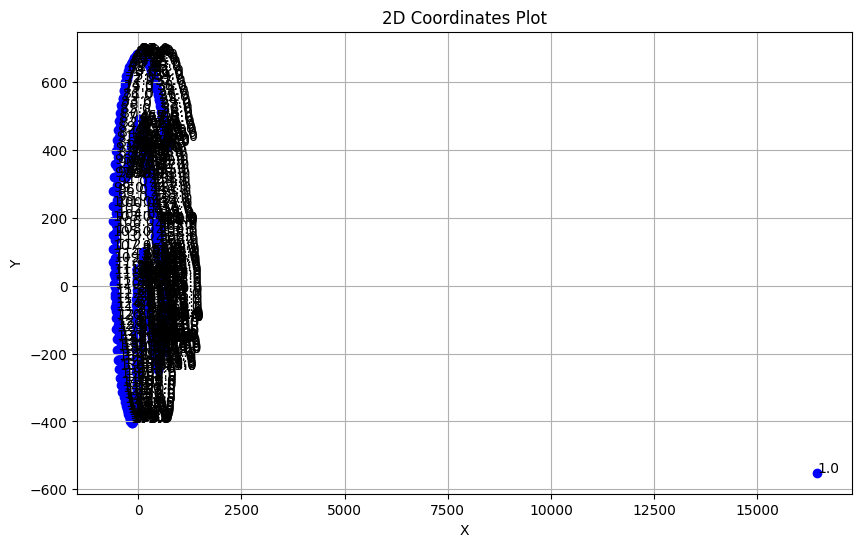

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the 2D coordinates data from a CSV file
file_path = '/content/Brassica_2d_coords.csv'  # Replace with your actual CSV file path
df = pd.read_csv(file_path)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'], c='blue', marker='o')
plt.title('2D Coordinates Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

# Annotate the points with their node numbers
for i, row in df.iterrows():
    plt.annotate(row['Node'], (row['X'], row['Y']))

# Show the plot
plt.show()


a
a


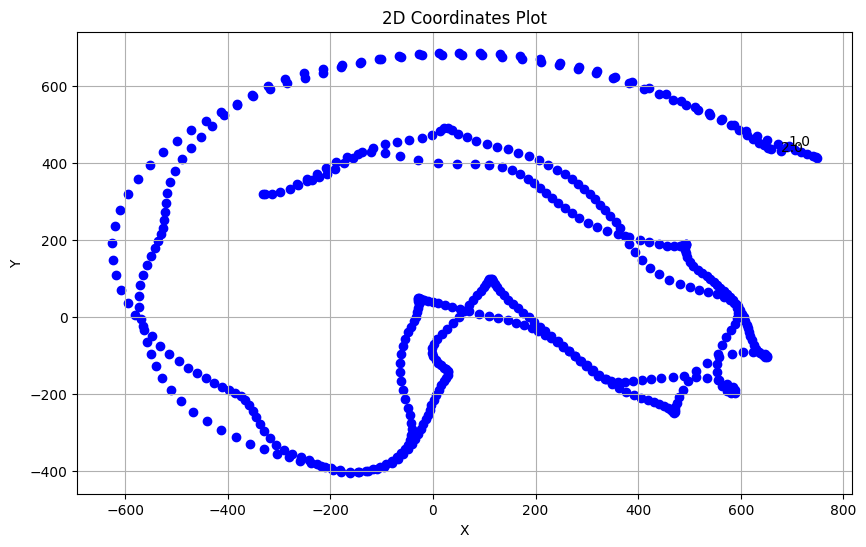

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the 2D coordinates data from a CSV file
file_path = '/content/Brassica_2d_coords.csv'  # Replace with your actual CSV file path
df = pd.read_csv(file_path)

# Adjust the X coordinate of node 1 to reside close to node 2
df.loc[df['Node'] == 1, 'X'] = df.loc[df['Node'] == 2, 'X'].values[0] + 15  # Adjust this value as needed
df.loc[df['Node'] == 1, 'Y'] = df.loc[df['Node'] == 2, 'Y'].values[0] + 15  # Adjust this value as needed
# Move the plot to the right by adding a constant value to X coordinates
df['X'] = df['X'] # Adjust this value as needed to fit the middle of the screen

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'], c='blue', marker='o')
plt.title('2D Coordinates Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

# Annotate the points with their node numbers
for i, row in df.iterrows():
  if row['Node'] == 1.0 or row['Node'] == 2:
    print('a')
    plt.annotate(row['Node'], (row['X'], row['Y']))

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load the 2D coordinates data from a CSV file
file_path = '/content/Brassica_2d_coords.csv'  # Replace with your actual CSV file path
df = pd.read_csv(file_path)

# Adjust the X coordinate of node 1 to reside close to node 2
df.loc[df['Node'] == 1, 'X'] = df.loc[df['Node'] == 2, 'X'].values[0] + 15  # Adjust this value as needed
df.loc[df['Node'] == 1, 'Y'] = df.loc[df['Node'] == 2, 'Y'].values[0] + 15  # Adjust this value as needed

# Move the plot to the right by adding a constant value to X coordinates
df['X'] = df['X']  # Adjust this value as needed to fit the middle of the screen


# Create JSON data from the adjusted DataFrame
json_data = [
    {
        "id": f"Node{int(row['Node'])}",
        "ChID": 1.0,
        "x": row['X'],
        "y": row['Y']
    }
    for _, row in df.iterrows()
]

# Save to a JSON file
output_file_path = '/content/nodes.json'
with open(output_file_path, 'w') as f:
    json.dump(json_data, f, indent=4)
files.download(output_file_path)
# Print to confirm
#print(json.dumps(json_data, indent=4))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[
    {
        "id": "Node1",
        "ChID": 1.0,
        "x": 693.358,
        "y": 445.697
    },
    {
        "id": "Node2",
        "ChID": 1.0,
        "x": 678.358,
        "y": 430.697
    },
    {
        "id": "Node3",
        "ChID": 1.0,
        "x": 748.339,
        "y": 414.341
    },
    {
        "id": "Node4",
        "ChID": 1.0,
        "x": 659.762,
        "y": 436.075
    },
    {
        "id": "Node5",
        "ChID": 1.0,
        "x": 747.389,
        "y": 415.805
    },
    {
        "id": "Node6",
        "ChID": 1.0,
        "x": 653.408,
        "y": 440.349
    },
    {
        "id": "Node7",
        "ChID": 1.0,
        "x": 739.756,
        "y": 419.307
    },
    {
        "id": "Node8",
        "ChID": 1.0,
        "x": 644.879,
        "y": 446.013
    },
    {
        "id": "Node9",
        "ChID": 1.0,
        "x": 729.901,
        "y": 423.518
    },
    {
        "id": "Node10",
        "ChID": 1.0,
        "x": 634.864,
        "y": 453.311
    